In [4]:
import pandas as pd

df = pd.read_excel('DS1_C4_S9_Car_Data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Make                            1201 non-null   object 
 2   Model                           1276 non-null   object 
 3   Variant                         1276 non-null   object 
 4   Displacement                    1264 non-null   float64
 5   Cylinders                       1210 non-null   float64
 6   Valves_Per_Cylinder             1174 non-null   float64
 7   Fuel_Tank_Capacity_litre        1207 non-null   float64
 8   Fuel_Type                       1276 non-null   object 
 9   Height_mm                       1275 non-null   float64
 10  Length_mm                       1276 non-null   float64
 11  Width_mm                        1264 non-null   float64
 12  Body_Type                       12

In [ ]:

df.isnull().sum()

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [6]:
#Replace the missing values in categorical columns with "Not Available"

def missing_value_treatment(df):
    cat_col = [col for col in df.columns if df[col].dtype == 'object']
    df[cat_col] = df[cat_col].fillna('Not Available')
    return df

df = missing_value_treatment(df)
df.isnull().sum()

S. No.                              0
Make                                0
Model                               0
Variant                             0
Displacement                       12
Cylinders                          66
Valves_Per_Cylinder               102
Fuel_Tank_Capacity_litre           69
Fuel_Type                           0
Height_mm                           1
Length_mm                           0
Width_mm                           12
Body_Type                           0
Doors                               4
City_Mileage_km_litre             555
Highway_Mileage_km_litre          800
Kerb_Weight                         0
Power                               0
Torque                              2
Seating_Capacity                    6
Central_Locking                     0
Child_Safety_Locks                  0
Hill_Assist                         0
Drive_Modes                         0
High_Speed_Alert_System             0
ABS_(Anti-lock_Braking_System)      0
Gross_Vehicl

In [32]:
#Replace the missing values with the mean or median for numerical columns based on the existing values within the same manufacturer's group

def fill_missing_values(cols):
    for col in cols:
        df[col] = df.groupby('Make')[col].transform(lambda x: x.fillna(x.mean()))
    return df

num_col = [col for col in df.columns if df[col].dtype != 'object']
df = fill_missing_values(num_col)
df.isnull().sum()
   

S. No.                             0
Make                               0
Model                              0
Variant                            0
Displacement                       0
Cylinders                          2
Valves_Per_Cylinder                0
Fuel_Tank_Capacity_litre          17
Fuel_Type                          0
Height_mm                          0
Length_mm                          0
Width_mm                          11
Body_Type                          0
Doors                              0
City_Mileage_km_litre             62
Highway_Mileage_km_litre          72
Kerb_Weight                        0
Power                              0
Torque                             0
Seating_Capacity                   0
Central_Locking                    0
Child_Safety_Locks                 0
Hill_Assist                        0
Drive_Modes                        0
High_Speed_Alert_System            0
ABS_(Anti-lock_Braking_System)     0
Gross_Vehicle_Weight               0
A

In [43]:
# identify and categorize cars based on make, model, and body type

categorize_cars = df.groupby(['Make', 'Model', 'Body_Type']).size().reset_index(name='count')
categorize_cars




,Make,Model,Body_Type,count
0,Aston Martin,Db 11,Coupe,1
1,Aston Martin,Rapide,Sedan,1
2,Aston Martin,Vantage,Coupe,1
3,Audi,A3,Sedan,4
4,Audi,A3 Cabriolet,Convertible,1
...,...,...,...,...
274,Volvo,V40 Cross Country,Hatchback,2
275,Volvo,V90 Cross Country,SUV,1
276,Volvo,Xc40,SUV,3
277,Volvo,Xc60,SUV,1


# Market Segment Analysis


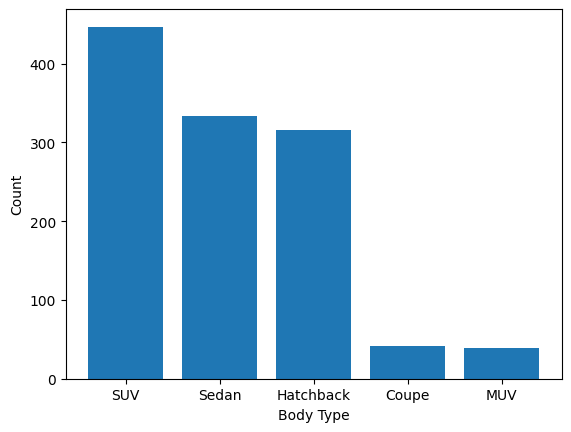

In [9]:
# A car manufacturer wants to introduce a new car and requires
# information about the top 5 most preferred car body types.
# Display the results using a horizontal bar chart.

import matplotlib.pyplot as plt

top_5_body_types = df['Body_Type'].value_counts().head(5)
plt.bar(top_5_body_types.index, top_5_body_types.values)
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.show()



In [10]:
# List all the details of cars that can adapt to various driving
# conditions such as normal, comfort, eco, sport, and power
# mode.
# How many cars have all the above-mentioned features?

driving_modes = ['Normal', 'Comfort', 'Eco', 'Sport', 'Power']
filtered_cars = df[df['Drive_Modes'].str.contains('|'.join(driving_modes))]

print(len(filtered_cars))



195


# Fuel Efficiency Analysis

## Task 3

In [11]:
# top 10 manufacturers based on city mileage


top_10_manufacture = df.groupby('Make')['City_Mileage_km_litre'].median().sort_values(ascending=False).head(10)
print(top_10_manufacture)
    

Make
Maruti Suzuki    21.062826
Renault          21.040000
Datsun           20.946667
Tata             19.233542
Lexus            18.150000
Fiat             17.000000
Honda            16.805714
Hyundai          16.679853
Volkswagen       16.225000
Mahindra         16.000000
Name: City_Mileage_km_litre, dtype: float64


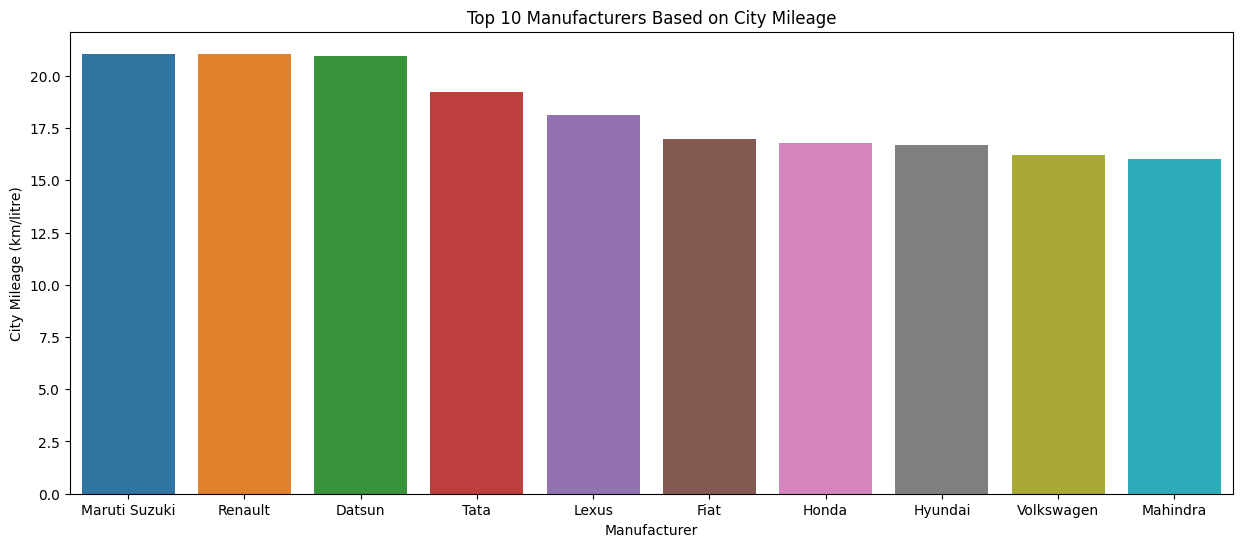

In [12]:

# Visualize the top 10 manufacturers based on city mileage using a bar plot.
# Creates a bar plot with manufacturers on the x-axis and their corresponding 
# city mileage values on the y-axis. Uses a muted color scheme and sets 
# appropriate labels and title for the plot.

import seaborn as sns


plt.figure(figsize=(15, 6))

sns.barplot(x=top_10_manufacture.index, y=top_10_manufacture.values, hue=top_10_manufacture.index)

sns.set_color_codes("muted")
plt.xlabel('Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.title('Top 10 Manufacturers Based on City Mileage') 
plt.show()



In [13]:
#outliers

Q1 = df['City_Mileage_km_litre'].quantile(0.25)  
Q3 = df['City_Mileage_km_litre'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  
outliers = df[(df['City_Mileage_km_litre'] < lower_bound) | (df['City_Mileage_km_litre'] > upper_bound)]
print(outliers.count())


## to overcome the outliers we use median method



S. No.                            5
Make                              5
Model                             5
Variant                           5
Displacement                      5
Cylinders                         5
Valves_Per_Cylinder               5
Fuel_Tank_Capacity_litre          5
Fuel_Type                         5
Height_mm                         5
Length_mm                         5
Width_mm                          5
Body_Type                         5
Doors                             5
City_Mileage_km_litre             5
Highway_Mileage_km_litre          5
Kerb_Weight                       5
Power                             5
Torque                            5
Seating_Capacity                  5
Central_Locking                   5
Child_Safety_Locks                5
Hill_Assist                       5
Drive_Modes                       5
High_Speed_Alert_System           5
ABS_(Anti-lock_Braking_System)    5
Gross_Vehicle_Weight              5
Airbags                     

In [14]:
# top 20 non electric cars
non_electric = df[df['Fuel_Type'] != 'Electric']
top_20 = non_electric.sort_values('City_Mileage_km_litre', ascending=False).head(20)
print(top_20)


      S. No.           Make   Model                   Variant  Displacement  \
165      165  Maruti Suzuki   Dzire                   Vdi Amt        1248.0   
166      166  Maruti Suzuki   Dzire              Zdi Plus Amt        1248.0   
155      155  Maruti Suzuki   Dzire                       Ldi        1248.0   
157      157  Maruti Suzuki   Dzire                       Vdi        1248.0   
159      159  Maruti Suzuki   Dzire                   Zdi Amt        1248.0   
160      160  Maruti Suzuki   Dzire                       Zdi        1248.0   
164      164  Maruti Suzuki   Dzire                  Zdi Plus        1248.0   
1091    1091  Maruti Suzuki    Ciaz   1.3L Delta Smart Hybrid        1248.0   
1092    1092  Maruti Suzuki    Ciaz    1.3L Zeta Smart Hybrid        1248.0   
1090    1090  Maruti Suzuki    Ciaz   1.3L Sigma Smart Hybrid        1248.0   
1089    1089  Maruti Suzuki    Ciaz   1.3L Alpha Smart Hybrid        1248.0   
903      903  Maruti Suzuki  Baleno                 

# Task 4

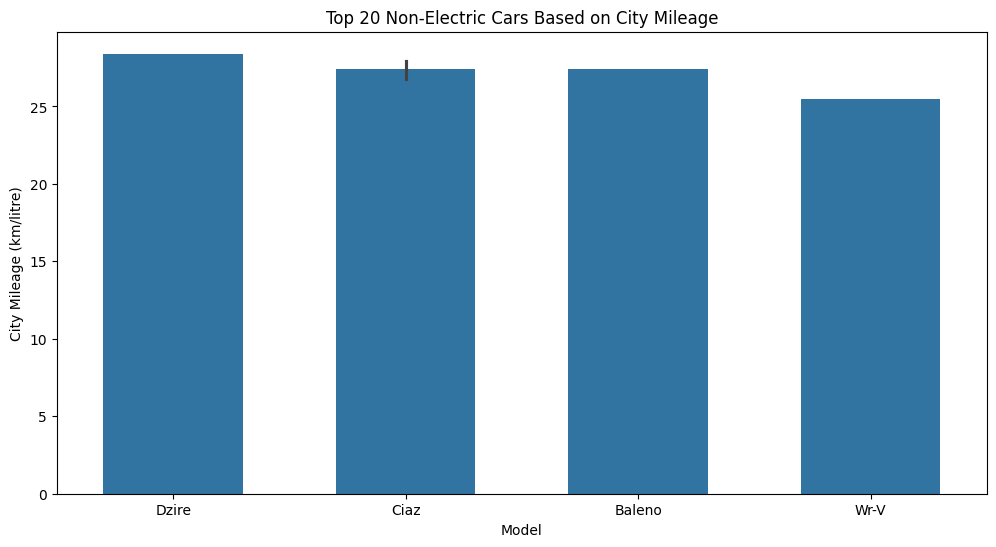

In [15]:
# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20['Model'], y=top_20['City_Mileage_km_litre'], width=0.6)
plt.xlabel('Model')
plt.ylabel('City Mileage (km/litre)')
plt.title('Top 20 Non-Electric Cars Based on City Mileage')
plt.show()

# Task 5

In [16]:
# Display the car mileages for the following four companies using
# a pivot table:
# Hyundai, Mahindra, Renault, and Skoda
# Create 4 separate pivot tables capturing the following details:
# 1. Mean of city mileage
# 2. Median of city mileage
# 3. Mean of highway mileage
# 4. Median of highway mileage

companies = ['Hyundai', 'Mahindra', 'Renault', 'Skoda']

in_companies = df[df['Make'].isin(companies)][['Make', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre']]

pivot_tab = in_companies.pivot_table(values=['City_Mileage_km_litre', 'Highway_Mileage_km_litre'], index='Make',
                                     aggfunc={'City_Mileage_km_litre': ['mean', 'median'], 
                                              'Highway_Mileage_km_litre': ['mean', 'median']})


print(pivot_tab)



         City_Mileage_km_litre            Highway_Mileage_km_litre           
                          mean     median                     mean     median
Make                                                                         
Hyundai              16.679853  16.679853                18.294146  18.294146
Mahindra             20.003763  16.000000                18.140175  18.140175
Renault              20.554286  21.040000                17.690000  17.690000
Skoda                13.953333  13.953333                17.268529  17.268529


# Task 6

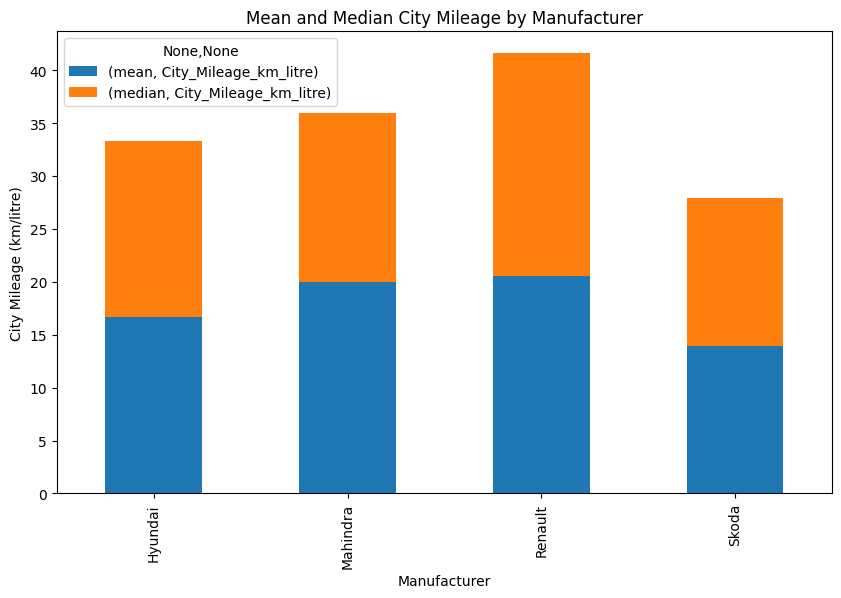

In [17]:
# Display the mean and median values of city mileages of the
# following manufacturers, using a stacked column chart:
# Hyundai, Renault, Mahindra, and Skoda


companies = ['Hyundai', 'Renault', 'Mahindra', 'Skoda']

in_companies = df[df['Make'].isin(companies)][['Make', 'City_Mileage_km_litre']]

pivot_tab = in_companies.pivot_table(values='City_Mileage_km_litre', index='Make', aggfunc=['mean', 'median'])

pivot_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.title('Mean and Median City Mileage by Manufacturer')
plt.show()

# Task 7

C:\Users\subha\AppData\Local\Temp\ipykernel_3396\296278732.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_mileage.values, y=average_mileage.index, palette='muted')


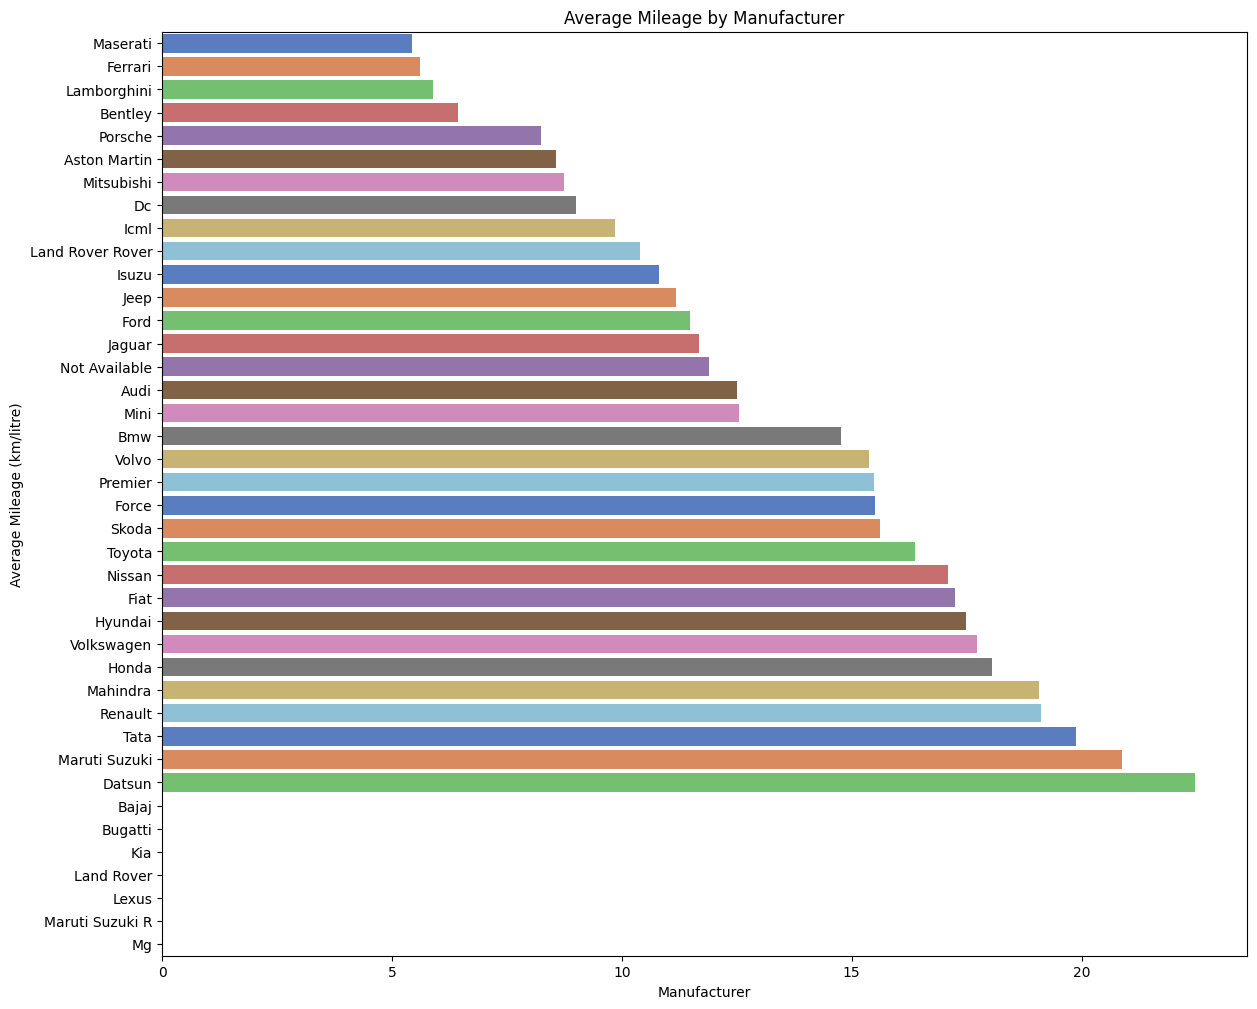

In [18]:
df['average_mileage'] = (df['City_Mileage_km_litre'] + df['Highway_Mileage_km_litre']) / 2

# average mileage by manufacturer
average_mileage = df.groupby('Make')['average_mileage'].mean().sort_values()

# bar plot
plt.figure(figsize=(14, 12))
sns.barplot(x=average_mileage.values, y=average_mileage.index, palette='muted')
plt.xlabel('Manufacturer')
plt.ylabel('Average Mileage (km/litre)')
plt.title('Average Mileage by Manufacturer')
plt.show()

# Task 8

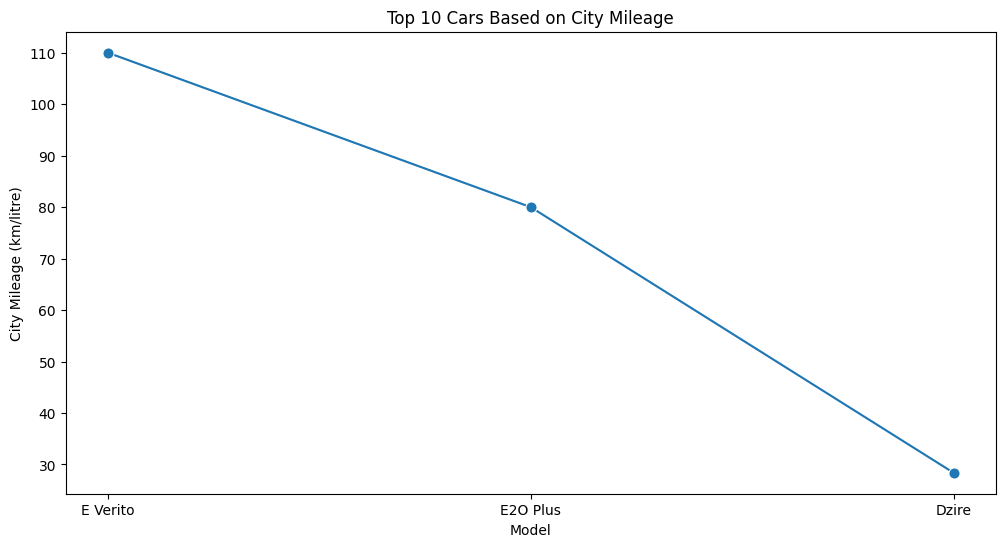

In [19]:
# top 10 highest city mileage cars

top_10 = df.sort_values('City_Mileage_km_litre', ascending=False).head(10)

# line chart

plt.figure(figsize=(12, 6))
sns.lineplot(x=top_10['Model'], y=top_10['City_Mileage_km_litre'], marker='o', markersize=8)
plt.xlabel('Model')
plt.ylabel('City Mileage (km/litre)')
plt.title('Top 10 Cars Based on City Mileage')
plt.show()


# Task 9

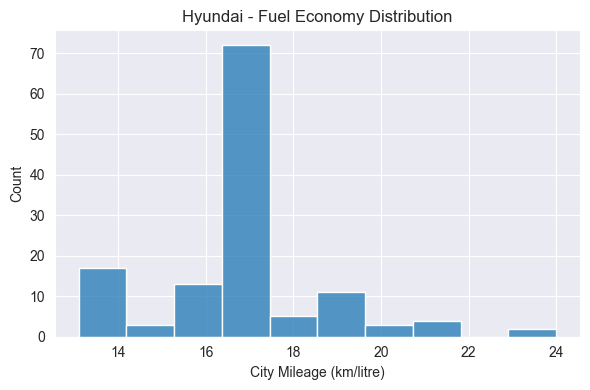

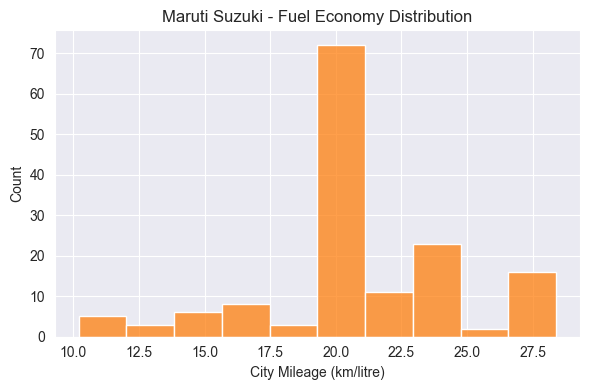

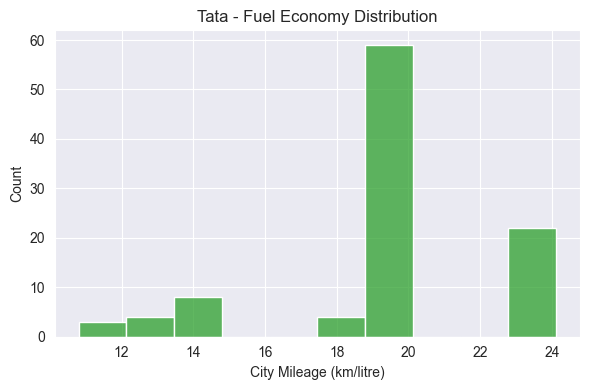

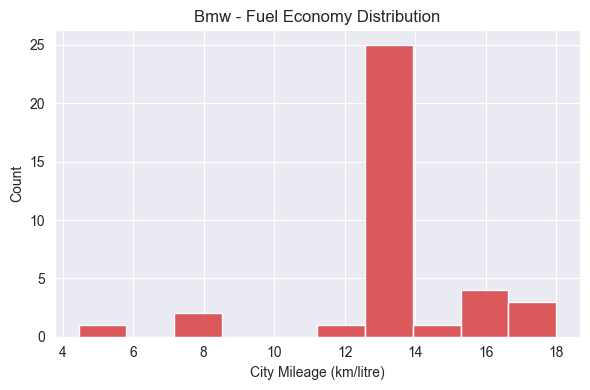

In [20]:

# Filter data for selected manufacturers
manufacturers = ['Hyundai', 'Maruti Suzuki', 'Tata', 'Bmw']
filtered_df = df[df['Make'].isin(manufacturers)]


# Set plot style
sns.set_style(style='darkgrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Function to plot histogram for a specific manufacturer
def plot_histogram(make):
    data = filtered_df[filtered_df['Make'] == make]['City_Mileage_km_litre']
    plt.figure(figsize=(6, 4))
    sns.histplot(data, bins=10, color=colors[manufacturers.index(make)])
    plt.title(f'{make} - Fuel Economy Distribution')
    plt.xlabel('City Mileage (km/litre)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot individual histograms 
for make in manufacturers:
    plot_histogram(make)




In [21]:
# Calculate skewness
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew

# Calculate skewness
print("Skewness of City Mileage Distribution:")
for make in manufacturers:
    mileage = filtered_df[filtered_df['Make'] == make]['City_Mileage_km_litre']
    print(f"{make}: {skew(mileage):.2f}")

"""
BMW is highly skewed to the right
Hyundai is slightly skewed to the right
"""

    

Skewness of City Mileage Distribution:
Hyundai: 0.75
Maruti Suzuki: -0.46
Tata: -0.56
Bmw: -1.55


'\nBMW is highly skewed to the right\nHyundai is slightly skewed to the right\n'

# Task 10

In [22]:
# create a new dataframe
new_df = df[['Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement',
              'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre',
                'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight']]    


new_df = pd.DataFrame(new_df)



# Task 11

In [23]:

# remove "kg" and ensure the column is numerical.
new_df["Kerb_Weight"] = new_df["Kerb_Weight"].str.replace("kg", "")
new_df["Gross_Vehicle_Weight"] = new_df["Gross_Vehicle_Weight"].str.replace("kg", "")


# convert to numerical
new_df["Kerb_Weight"] = pd.to_numeric(new_df["Kerb_Weight"], errors="coerce")
new_df["Gross_Vehicle_Weight"] = pd.to_numeric(new_df["Gross_Vehicle_Weight"], errors="coerce")


# convert to pounds
new_df["Kerb_Weight"] = new_df["Kerb_Weight"] * 2.2
new_df["Gross_Vehicle_Weight"] = new_df["Gross_Vehicle_Weight"] * 2.2



# Perfomance Comparison

# Task 12

In [24]:
# function to compare the performance of cars based on a given column
def compare_performance(df, column):
    # Calculate mean, median, standard deviation, and coefficient of variation
    stats = df.groupby('Make')[column].agg(['mean', 'median', 'std', 'var'])
    stats['cv'] = stats['std'] / stats['mean'] * 100
    return stats


# Calculate mean, median, standard deviation, and coefficient of variation
stats = compare_performance(new_df, 'Displacement')
# Print the results
print(stats)


                         mean  median          std           var         cv
Make                                                                       
Aston Martin      5038.333333  5198.0   986.241519  9.726723e+05  19.574757
Audi              2256.354839  1984.0   836.304352  6.994050e+05  37.064399
Bajaj              216.000000   216.0     0.000000  0.000000e+00   0.000000
Bentley           5447.833333  5974.0  1164.710164  1.356550e+06  21.379328
Bmw               2707.918919  2979.0   924.567237  8.548246e+05  34.143092
Bugatti           7993.000000  7993.0     0.000000  0.000000e+00   0.000000
Datsun            1065.066667  1198.0   179.470836  3.220978e+04  16.850667
Dc                2000.000000  2000.0          NaN           NaN        NaN
Ferrari           4589.500000  3902.0  1125.891647  1.267632e+06  24.531902
Fiat              1269.391304  1248.0    65.088568  4.236522e+03   5.127542
Force             2447.000000  2596.0   230.829807  5.328240e+04   9.433176
Ford        

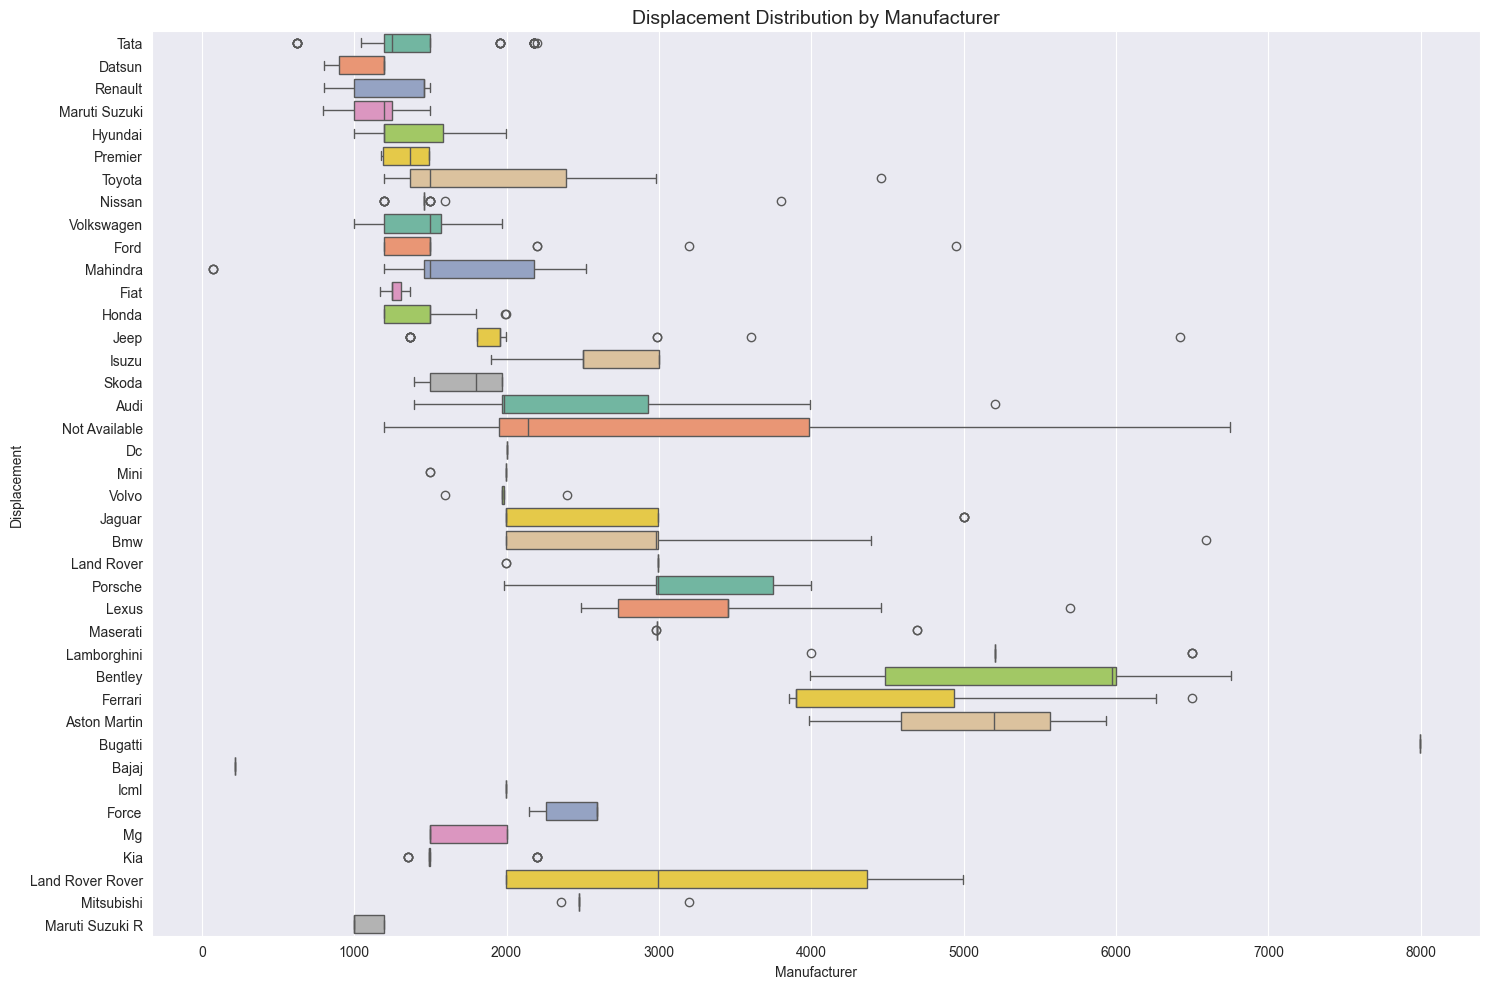

In [25]:
# box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Displacement', y='Make', data=new_df, palette='Set2')
plt.title('Displacement Distribution by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.tight_layout()
plt.show()

# Task 13

In [26]:
# Identify at least three features that affect the mileages (using
# correlation analysis) of cars from the following manufacturers:
# Renault, Toyota, and Honda
# Represent them visually using appropriate types of
# charts/graphs in Python.
# Illustrate with justification whether these factors affect
# the mileage of a car positively or negatively.

manufacturers = ['Renault', 'Toyota', 'Honda']
filtered_df = df[df['Make'].isin(manufacturers)]


# Check the correlation between mileage and other numerical features
correlation_matrix = filtered_df.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix['City_Mileage_km_litre'].sort_values(ascending=False)


# Identify top 3 features (excluding mileage itself)
top_features = correlation_matrix['City_Mileage_km_litre'].sort_values(ascending=False).index[1:4]
top_features



Index(['average_mileage', 'Highway_Mileage_km_litre', 'Doors'], dtype='object')

In [27]:
# Filter the dataset for the specified manufacturers
manufacturers = ['Renault', 'Toyota', 'Honda']
filtered_df = df[df['Make'].isin(manufacturers)]

# Check the correlation between mileage and other numerical features
correlation = filtered_df.select_dtypes(include=['float64', 'int64']).corr()['City_Mileage_km_litre'].sort_values(ascending=False)
print("Correlation with mileage:")
print(correlation)

Correlation with mileage:
City_Mileage_km_litre       1.000000
average_mileage             0.925947
Highway_Mileage_km_litre    0.464001
Doors                      -0.027399
S. No.                     -0.223348
Valves_Per_Cylinder        -0.224393
Seating_Capacity           -0.289442
Torque                     -0.380719
Height_mm                  -0.396024
Cylinders                  -0.498726
Length_mm                  -0.536053
Fuel_Tank_Capacity_litre   -0.548097
Width_mm                   -0.583435
Displacement               -0.593554
Power                      -0.646385
Name: City_Mileage_km_litre, dtype: float64


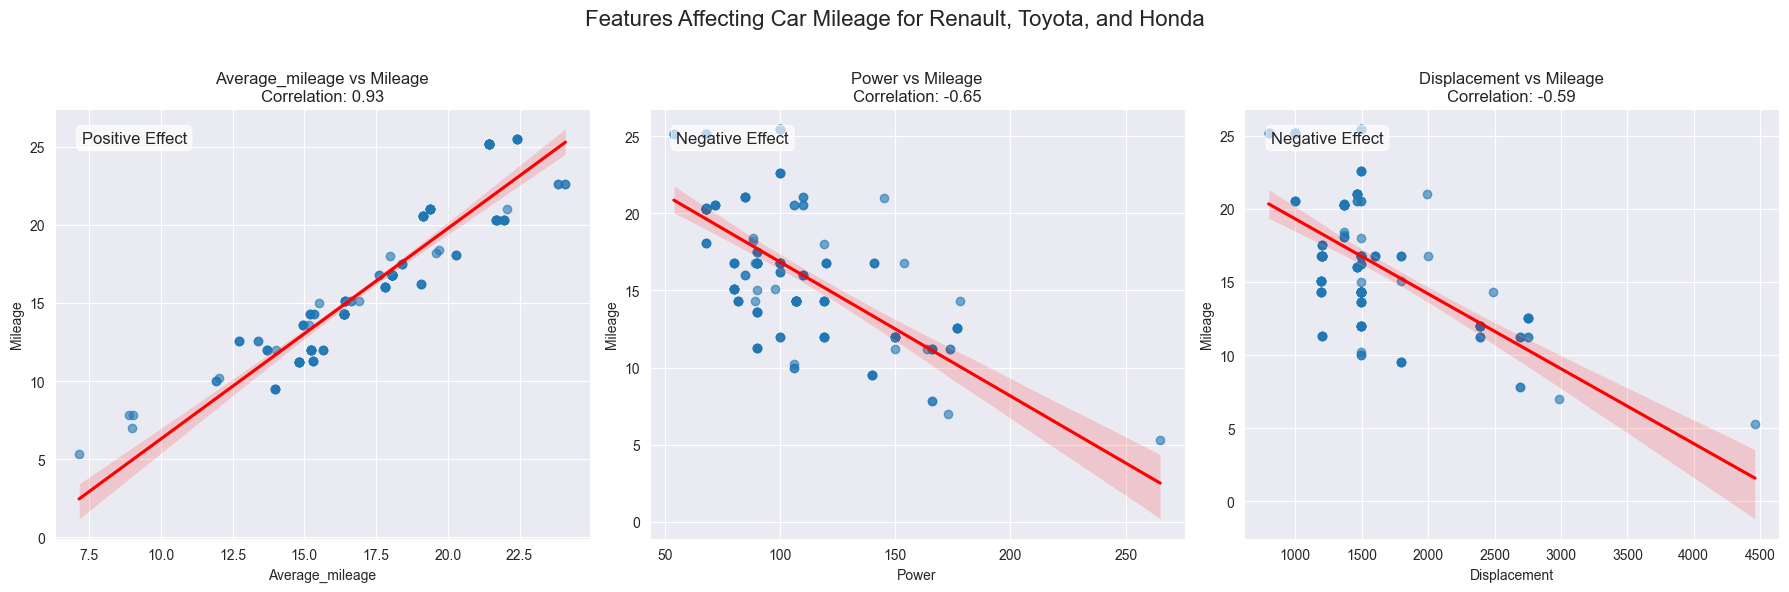

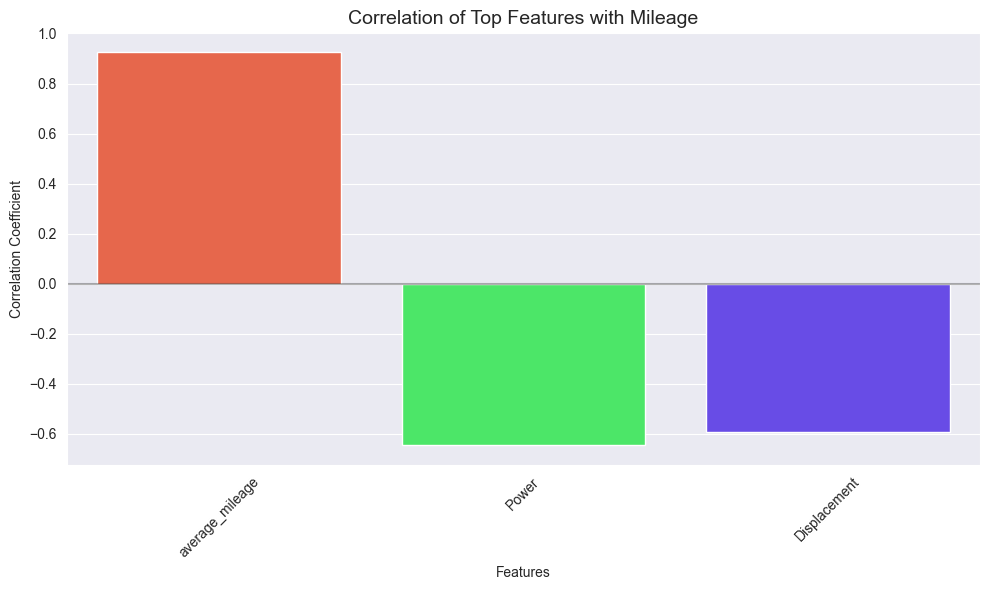

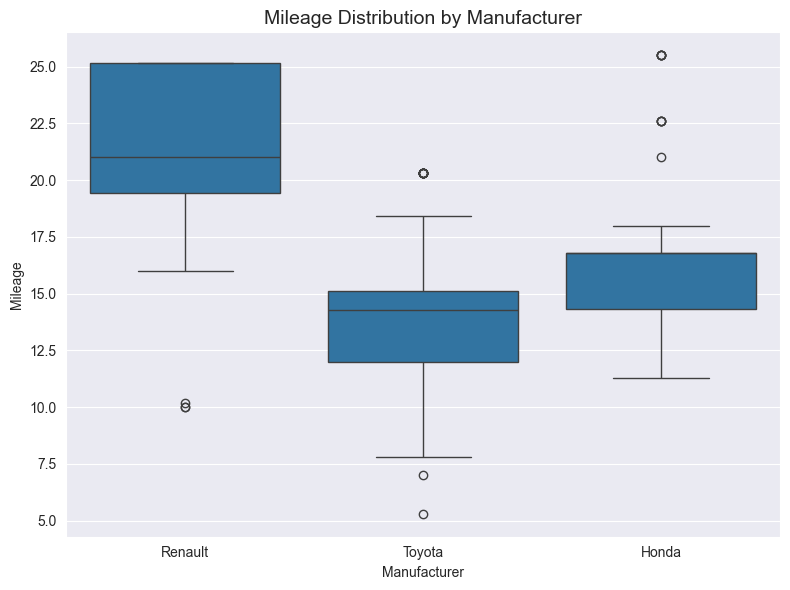

In [28]:
# Identify top 3 features (excluding mileage itself)
top_features = correlation.drop('City_Mileage_km_litre').abs().nlargest(3).index.tolist()

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Features Affecting Car Mileage for Renault, Toyota, and Honda', fontsize=16)

# Plot each feature's relationship with mileage
for i, feature in enumerate(top_features):
    # Create scatter plot with regression line
    sns.regplot(x=feature, y='City_Mileage_km_litre', data=filtered_df, ax=axes[i], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    
    # Add correlation coefficient to the plot
    corr_value = correlation[feature]
    axes[i].set_title(f'{feature.capitalize()} vs Mileage\nCorrelation: {corr_value:.2f}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Mileage')
    
    # Add text indicating positive or negative effect
    effect = "Positive" if corr_value > 0 else "Negative"
    axes[i].annotate(f"{effect} Effect", xy=(0.05, 0.95), xycoords='axes fraction', 
                    fontsize=12, ha='left', va='top', 
                    bbox=dict(boxstyle='round', fc='white', alpha=0.7))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create a bar chart to compare the correlation values
plt.figure(figsize=(10, 6))
colors = ['#FF5733', '#33FF57', '#5733FF']
sns.barplot(x=top_features, y=correlation[top_features].values, palette=colors)
plt.title('Correlation of Top Features with Mileage', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a boxplot to show mileage distribution by manufacturer
plt.figure(figsize=(8, 6))
sns.boxplot(x='Make', y='City_Mileage_km_litre', data=filtered_df)
plt.title('Mileage Distribution by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Mileage')
plt.tight_layout()
plt.show()

# Task 14

In [29]:
# Compare the performance of cars based on factors like kerb
# weight and gross vehicle weight.
# Hint: Calculate and display the mean, median, standard
# deviation, and coefficient of variation for each manufacturer.

import numpy as np

coefficient_of_vation = lambda x: np.std(x)/np.mean(x) * 100

# Group by manufacturer and calculate statistics for kerb weight
kerb_weight_stats = new_df.groupby('Make')['Kerb_Weight'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('cv', coefficient_of_vation)
]).round(2)

# Group by manufacturer and calculate statistics for gross vehicle weight
gross_vehicle_weight_stats = new_df.groupby('Make')['Gross_Vehicle_Weight'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('cv', coefficient_of_vation)
]).round(2)

# Print the results
print("Kerb Weight Statistics:")
print(kerb_weight_stats)


Kerb Weight Statistics:
                     mean  median      std     cv
Make                                             
Aston Martin      3813.33  3696.0   516.10  11.05
Audi              3982.00  3916.0   753.23  18.61
Bajaj                 NaN     NaN      NaN    NaN
Bentley           5407.23  5335.0   268.97   4.54
Bmw               3775.30  3751.0   252.62   6.53
Bugatti           4389.00  4389.0     0.00   0.00
Datsun            1900.80  1900.8     0.00   0.00
Dc                3476.00  3476.0      NaN   0.00
Ferrari           3594.25  3470.5   449.63  11.70
Fiat              2642.10  2673.0   117.42   4.34
Force                 NaN     NaN      NaN    NaN
Ford              2794.53  2684.0   815.36  28.67
Honda             2467.48  2405.7   344.03  13.83
Hyundai           2446.49  2420.0   380.56  15.39
Icml              3778.80  3762.0    28.77   0.73
Isuzu             4264.33  4257.0    12.70   0.24
Jaguar            3815.96  3803.8   234.18   5.97
Jeep              3755.73 

In [30]:

print("\nGross Vehicle Weight Statistics:")
print(gross_vehicle_weight_stats)



Gross Vehicle Weight Statistics:
                     mean  median      std     cv
Make                                             
Aston Martin      4578.20  4578.2      NaN   0.00
Audi              5050.90  4807.0   871.60  16.96
Bajaj                 NaN     NaN      NaN    NaN
Bentley           6744.47  6789.2   443.50   6.00
Bmw               5091.78  5093.0   645.57  12.32
Bugatti               NaN     NaN      NaN    NaN
Datsun                NaN     NaN      NaN    NaN
Dc                3476.00  3476.0      NaN   0.00
Ferrari               NaN     NaN      NaN    NaN
Fiat              2800.60  3388.0  1313.47  41.95
Force             5813.50  5813.5   336.60   5.01
Ford              3698.75  3718.0    35.76   0.93
Honda             2723.74  2365.0   531.16  19.18
Hyundai           3016.41  3124.0   522.63  17.12
Icml              5442.00  5412.0    51.38   0.90
Isuzu             4873.00  4873.0    46.67   0.68
Jaguar            4934.05  4906.0   458.76   9.00
Jeep            

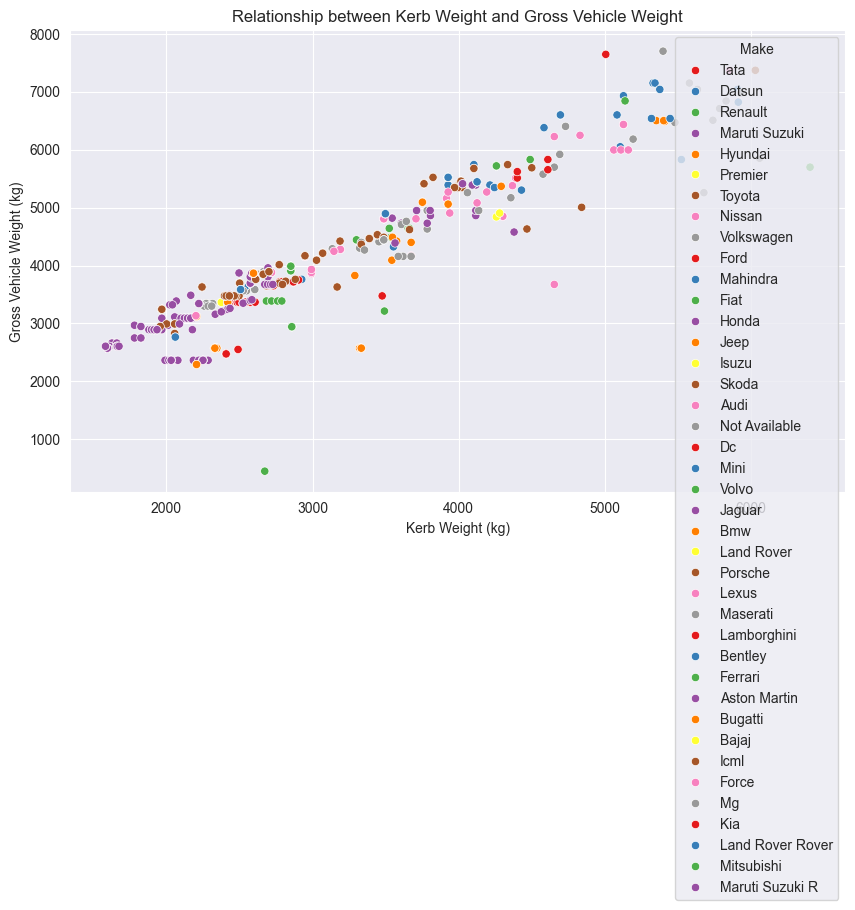

In [31]:
# Relationship between kerb weight and gross vehicle weight
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='Kerb_Weight', y='Gross_Vehicle_Weight', hue='Make', palette='Set1')
plt.xlabel('Kerb Weight (kg)')
plt.ylabel('Gross Vehicle Weight (kg)')
plt.title('Relationship between Kerb Weight and Gross Vehicle Weight')
plt.show()